<a href="https://colab.research.google.com/github/roy-sub/Tripadvisor/blob/main/tripadvisor_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tripadvisor Data Analysis and DL Model Development and Testing**

###**Introduction**
In this project, we will be exploring the hotel reviews and the rating base on customer hotel experience. We will be also looking at feature engineering and designing a deep learning model to predict ratings based on reviews.We also be using NLP tools for feature extractions and preparing the data for deep learning models.

###**About Tripadvisor**
Tripadvisor, Inc. is an American online travel company that operates a website and mobile app with user-generated content and a comparison shopping website. It also offers online hotel reservations and bookings for transportation, lodging, travel experiences, and restaurants. Its headquarters are in Needham, Massachusetts. Wikipedia

###**About this dataset**
Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged. With this dataset, consisting of 20k reviews crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels! Dataset Link : [CLick Here](https://zenodo.org/records/1219899#.YHwt1J_ivIU)

#**Import Libraries**

In [ ]:
## All purpose
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

In [ ]:
## NLP
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
# from gensim.summarization import keywords

In [ ]:
## Deeplearning/ML
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
! pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.5 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
! pip3 install "gensim==3.8.2"
from gensim.summarization import keywords

#**Data Preprocessing**

###**VADER-Sentiment-Analysis**

[VADER](https://github.com/cjhutto/vaderSentiment#introduction) (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

In [ ]:
! gdown --id 1IxQ38lPl_puxhdoCZnQX8BoZ9-HSas3x

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IxQ38lPl_puxhdoCZnQX8BoZ9-HSas3x
To: /content/tripadvisor_hotel_reviews.csv
100% 15.1M/15.1M [00:00<00:00, 126MB/s]


###**Compund score & Sentiment**

Using Vader to get sentimental scores and then converting those scores into 3 categorical Sentiments, Positive Negative, and Neutral.

In [ ]:
## Creating sentimental polarity
analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

###**Applying functions**
Applying both functions to our original database to create two additional columns of Sentiment_score and Sentiment.

In [ ]:
## Importing CSV file
df = pd.read_csv("/content/tripadvisor_hotel_reviews.csv", encoding = "ISO-8859-1")

## Applying Compund score
polarity_scores = df["Review"].astype("str").apply(compound_score)
df["Sentiment_Score"] = polarity_scores

## Applying Sentiment
df["Sentiment"] = df["Sentiment_Score"].apply(sentiment)

###**Saving file**
Saving file so it can be used later for another project.

In [ ]:
## Saving preprocessed file
df.to_csv("Trip-Advisor-rating-sentiments.csv",index=False)
df.Sentiment.value_counts()

Positive    18321
Negative     1093
Neutral      1077
Name: Sentiment, dtype: int64

#**Loading Preprocessed Dataset**

In [ ]:
# Importing the Trip-Advisor-Hotel-Review Dataset
data=pd.read_csv('Trip-Advisor-rating-sentiments.csv')

# Having a look at the data
data.head()

,S.No.,Review,Rating,Sentiment_Score,Sentiment
0,1,nice hotel expensive parking got good deal sta...,4,0.9626,Positive
1,2,ok nothing special charge diamond member hilto...,2,0.9870,Positive
2,3,nice rooms not 4* experience hotel monaco seat...,3,0.9852,Positive
3,4,unique \tgreat stay \twonderful time hotel mon...,5,0.9920,Positive
4,5,great stay great stay \twent seahawk game awes...,5,0.9870,Positive


In [ ]:
data.isna().sum()

S.No.              0
Review             0
Rating             0
Sentiment_Score    0
Sentiment          0
dtype: int64

#**Data Visualization**

###**Countplot of Sentiments**

Most of the comments are Positive, as shown in seaborn countplot

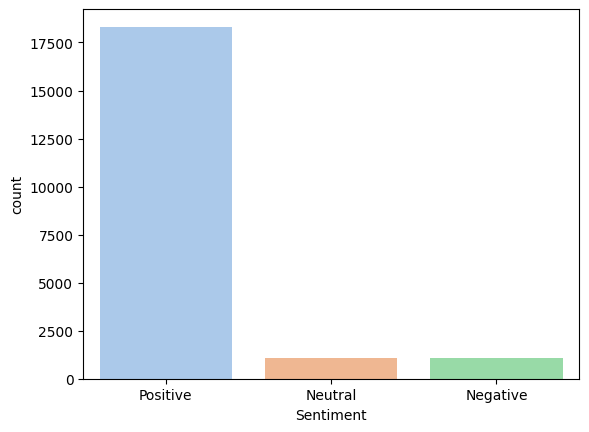

In [ ]:
sns.countplot(data=data,x="Sentiment",palette="pastel");

###**Plotting the Bar Graph**

In the bar plot, we can see the distribution of sentiment and rating, people with 5-star ratings have the highest positive sentiment. whereas at lower ratings its mixed emotions showed by customers review, this can be related to sarcasm

In [ ]:
# Preparing data for visualization
Viz_1 = data[['Rating','Sentiment']].value_counts().rename_axis(['Rating','Sentiment']).reset_index(name='counts')

# Plotting the Bar Graph
fig = px.bar(x=Viz_1.Rating, y=Viz_1.counts, color=Viz_1.Sentiment,color_discrete_sequence=px.colors.qualitative.Pastel,title="Sentiment & Ratings",labels={'x':'Ratings','y':'Total Number'})
fig.show()

###**Plotting a pie chart of ratings**
A simple pie chart using Plotly library can give you an idea of the distribution of different ratings. The majority of people are giving a positive and 4-5star rating.

In [ ]:
#Viz2 Data preparation
Viz_2 = data['Rating'].value_counts().rename_axis(['Rating']).reset_index(name='counts')

# Plotting  pie chart for ratings
fig_pie = px.pie(values=Viz_2.counts, names=Viz_2.Rating, title='Rating Distribution of the data',color_discrete_sequence=px.colors.qualitative.Pastel)
fig_pie.show()

###**Jointplot on the basis of Rating and Sentiment Score.**
Joint plot reg shows on who sentimental score is directly affected by ratings, but it's all over the place, you won't find certain pattern or clusters.

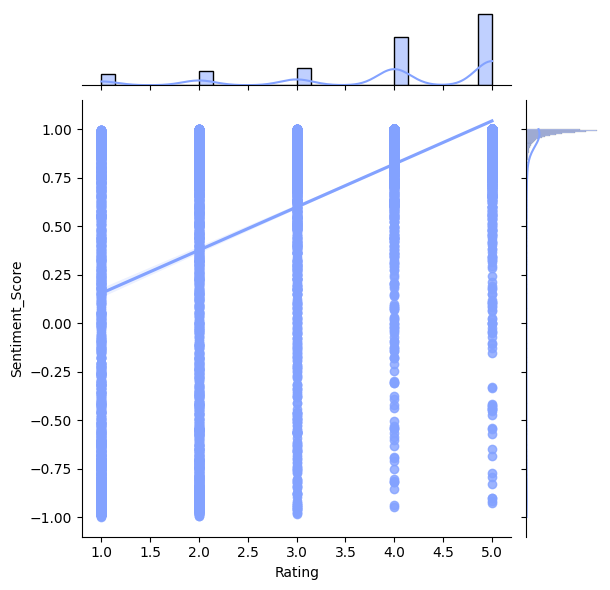

In [ ]:
# Jointplot on the basis of Rating and Sentiment Score of the data
jp = sns.jointplot(data=data,x='Rating',y='Sentiment_Score',kind="reg",color='#83A2FF')

###**Violin plot**
Violion plot gives us a better picture of the relationship between Ratings and Sentiments. From 3 to 5 rating most of the review sentiments are positive.

In [ ]:
fig = go.Figure()

Ratings = [1,2,3,4,5]

for rating in Ratings:
    fig.add_trace(go.Violin(x=data['Rating'][data['Rating'] == rating],
                            y=data['Sentiment_Score'][data['Rating'] == rating],
                            name=rating,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(
    title="Violin plot of Rating and Sentiment Score with box plot",
    xaxis_title="Rating",
    yaxis_title="Sentiment Score",
    font=dict(
        family="Courier New, monospace",
        size=12,

    )
)
fig.show()

###**Wordcloud of Different Sentiments**

In [ ]:
Sentiment = 'Positive'

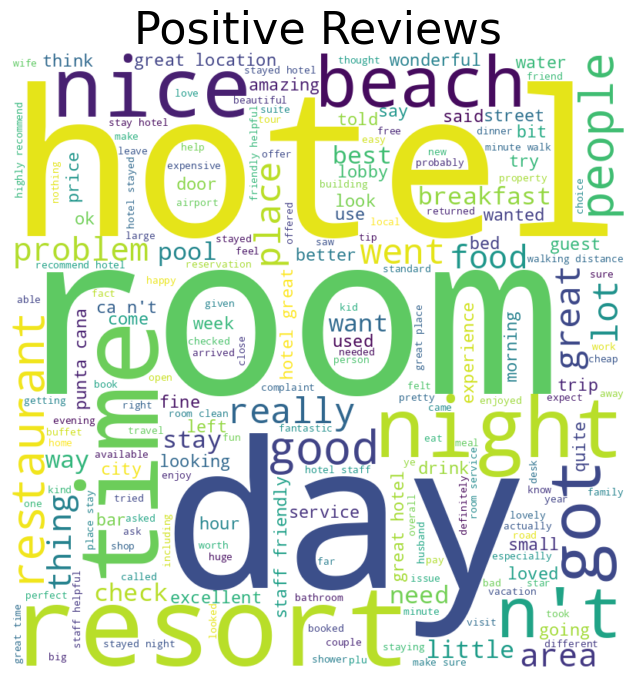

In [ ]:
text1 =''
for i in data[data['Sentiment']==str(Sentiment)]['Review'].values:
    text1+=i + ' '

wc = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True,)
wc.generate(text1)
plt.figure(figsize = (8, 8), facecolor = None)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(Sentiment+' Reviews',fontsize=32);

###**Wordcloud of all three sentiments**
The most common word used in all three Sentiments was a hotel room. Which is quite obvious ,hotel managers can to focus on if they want a better rating from customers.

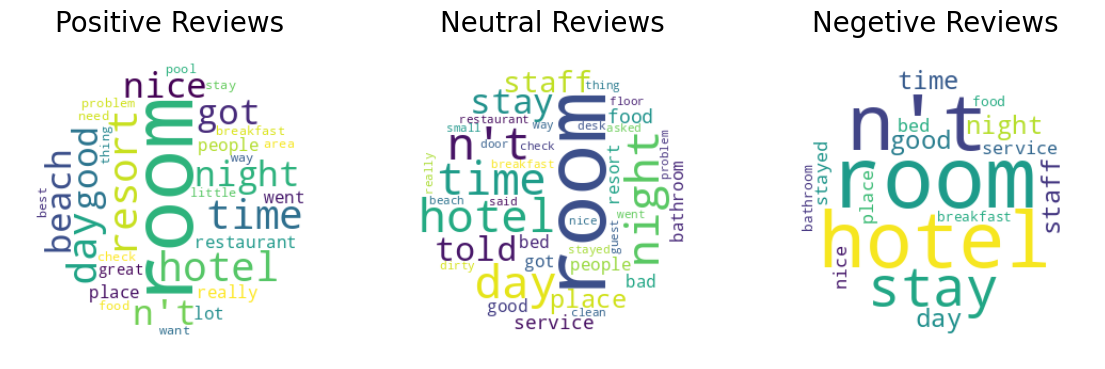

In [ ]:
# Getting all the reviews termed positive in a single string and forming a word cloud of the string
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[14, 14], facecolor = None)

text1 =''
for i in data[data['Sentiment']=='Positive']['Review'].values:
    text1+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc1 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc1.generate(text1)

ax1.axis("off")
ax1.imshow(wc1, interpolation="bilinear")
ax1.set_title('Positive Reviews',fontsize=20);

text2 =''
for i in data[data['Sentiment']=='Negative']['Review'].values:
    text2+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc2 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc2.generate(text2)

ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title('Neutral Reviews',fontsize=20);

text3 =''
for i in data[data['Sentiment']=='Neutral']['Review'].values:
    text3+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc3 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc3.generate(text3)

ax3.axis("off")
ax3.imshow(wc3, interpolation="bilinear")
ax3.set_title('Negetive Reviews',fontsize=20);

plt.show()

#**Keywords**

###**Testing Gensim Keywords**

`gensim.summarization.keywords` This module contains functions to find keywords of the text and building graph on tokens from text. More can be found at [Gensim](https://radimrehurek.com/gensim_3.8.3/summarization/keywords.html)

In [ ]:
# Insert the String of your choice here
input_1 = 'AI Platform Pipelines has two major parts: (1) the infrastructure for deploying and running structured AI workflows that are integrated with Google Cloud Platform services and (2) the pipeline tools for building, debugging, and sharing pipelines and components. The service runs on a Google Kubernetes cluster that’s automatically created as a part of the installation process, and it’s accessible via the Cloud AI Platform dashboard. With AI Platform Pipelines, developers specify a pipeline using the Kubeflow Pipelines software development kit (SDK), or by customizing the TensorFlow Extended (TFX) Pipeline template with the TFX SDK. This SDK compiles the pipeline and submits it to the Pipelines REST API server, which stores and schedules the pipeline for execution'

keywords(input_1).split("\n")

['pipelines',
 'pipeline',
 'platform',
 'developers',
 'development',
 'sdk',
 'tfx',
 'kubernetes']

In [ ]:
data.head()

,S.No.,Review,Rating,Sentiment_Score,Sentiment
0,1,nice hotel expensive parking got good deal sta...,4,0.9626,Positive
1,2,ok nothing special charge diamond member hilto...,2,0.9870,Positive
2,3,nice rooms not 4* experience hotel monaco seat...,3,0.9852,Positive
3,4,unique \tgreat stay \twonderful time hotel mon...,5,0.9920,Positive
4,5,great stay great stay \twent seahawk game awes...,5,0.9870,Positive


###**Applying Keywords to the Dataframe**

In [ ]:
data["keywords"] = data["Review"].apply(keywords)
data["keywords"] = data["keywords"].astype("str").str.replace('\n',',',)

In [ ]:
data.head()

,S.No.,Review,Rating,Sentiment_Score,Sentiment,keywords
0,1,nice hotel expensive parking got good deal sta...,4,0.9626,Positive,"parking,stay,staying,nice hotel,room,night,tal..."
1,2,ok nothing special charge diamond member hilto...,2,0.9870,Positive,"hotels,hotel room,suite,suites,suits,arrival e..."
2,3,nice rooms not 4* experience hotel monaco seat...,3,0.9852,Positive,"nice rooms,room great,night,wakeup calls,calle..."
3,4,unique \tgreat stay \twonderful time hotel mon...,5,0.9920,Positive,"hotel monaco,animal,like,free,friendly,great s..."
4,5,great stay great stay \twent seahawk game awes...,5,0.9870,Positive,"voucher taxi,vouchers,hotel,girlfriend,great,r..."


In [ ]:
words = []
for x in data.keywords.values:
    x=x.split(",")
    for i in x:
        words.append(i)

###**Using Counter**
Python Counter is a container that will hold the count of each of the elements present in the container.

In [ ]:
from collections import Counter
word_counter = Counter(words)

In [ ]:
word_df = pd.DataFrame(np.array(list(word_counter.items())),columns=["keyword","count"])

###**Top Ten Keywords**

In [ ]:
word_df["count"] = word_df["count"].astype(int)
word_df = word_df.sort_values(['count'], ascending=False)
top_20 = word_df[0:19]
word_df.head(10)

,keyword,count
4,room,7518
46,hotel,7516
1,stay,4440
107,rooms,4360
72,great,2800
130,stayed,2667
25,good,2634
11,hotels,2279
36,staff,2200
5,night,2080


###**Barplot of Top 20 Keywords**
apart from hotel rooms users are also talking about staff, location and breakfast.

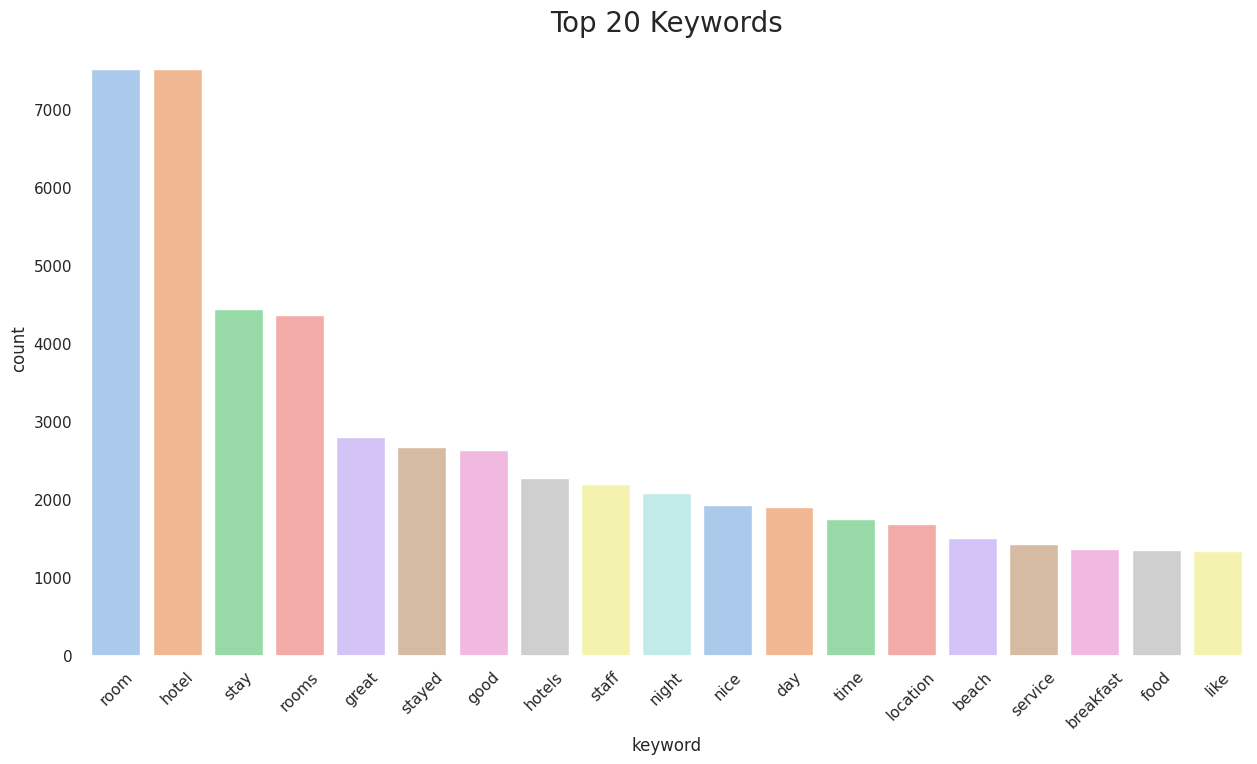

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
fig, ax = plt.subplots()

ax = sns.barplot(data=top_20,x="keyword",y="count",palette="pastel")
ax.patch.set_visible(False)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_title("Top 20 Keywords",fontsize=20);

#**Review Text Processing using NLTK**

###**Downloading NLTK**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

###**Removing most used words**
To imporve model performance and to increase accuray.

In [ ]:
top = ["room","hotel","stay","rooms"]
for x in top:
    data["Review"] = data["Review"].astype(str).str.replace(x,"")

In [ ]:
data.head(2)

,S.No.,Review,Rating,Sentiment_Score,Sentiment,keywords
0,1,nice expensive parking got good deal annive...,4,0.9626,Positive,"parking,stay,staying,nice hotel,room,night,tal..."
1,2,ok nothing special charge diamond member hilto...,2,0.9870,Positive,"hotels,hotel room,suite,suites,suits,arrival e..."


###**Stopwords**
The stop words are words which are filtered out before or after processing of natural language data (text). Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools specifically avoid removing these stop words to support phrase search.

In [ ]:
data2=data.copy()

def removing_stop_words(txt):
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(txt)

    filtered_sentence = [w for w in word_tokens if not w in stop_words]

    return filtered_sentence

data2["Review"] = data2["Review"].apply(removing_stop_words)

###**Text Lemmatizer**
Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors. For more information visit [Lemmatization Approaches with Examples in Python](https://www.machinelearningplus.com/nlp/lemmatization-examples-python/)

In [ ]:
# Making a function to lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(data):
    lema_data=[]
    for j in data:
        x=j.lower()
        x=lemmatizer.lemmatize(j,pos='n')
        x=lemmatizer.lemmatize(j,pos='v')
        x=lemmatizer.lemmatize(j,pos='a')
        x=lemmatizer.lemmatize(j,pos='r')
        x=lemmatizer.lemmatize(x)
        lema_data.append(x)
    return lema_data


data2["Review"] = data2["Review"].apply(lemmatize)

###**Text Joining**
Making all the comma seperated lemmatized words back into a string

In [ ]:
data2["Review"] = data2["Review"].apply(lambda x:" ".join(token for token in x))

In [ ]:
data2.head(2)

,S.No.,Review,Rating,Sentiment_Score,Sentiment,keywords
0,1,nice expensive parking got good deal anniversa...,4,0.9626,Positive,"parking,stay,staying,nice hotel,room,night,tal..."
1,2,ok nothing special charge diamond member hilto...,2,0.9870,Positive,"hotels,hotel room,suite,suites,suits,arrival e..."


You can use PoerterStemmer to improve the performance and you can also use other yet processing to improve the performance metric.



###**Tokenizer**
The Tokenizer class of Keras is used for vectorizing a text corpus. For this either, each text input is converted into integer sequence or a vector that has a coefficient for each token in the form of binary values.

In [ ]:
X = data2["Review"].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

###**Texts to Sequences**
texts_to_sequences method helps in converting tokens of text corpus into a sequence of integers. more can be learned from machinelearningknowledge.ai

<ipython-input-40-2c363bb2cf99>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(length_dist,palette="pastel")


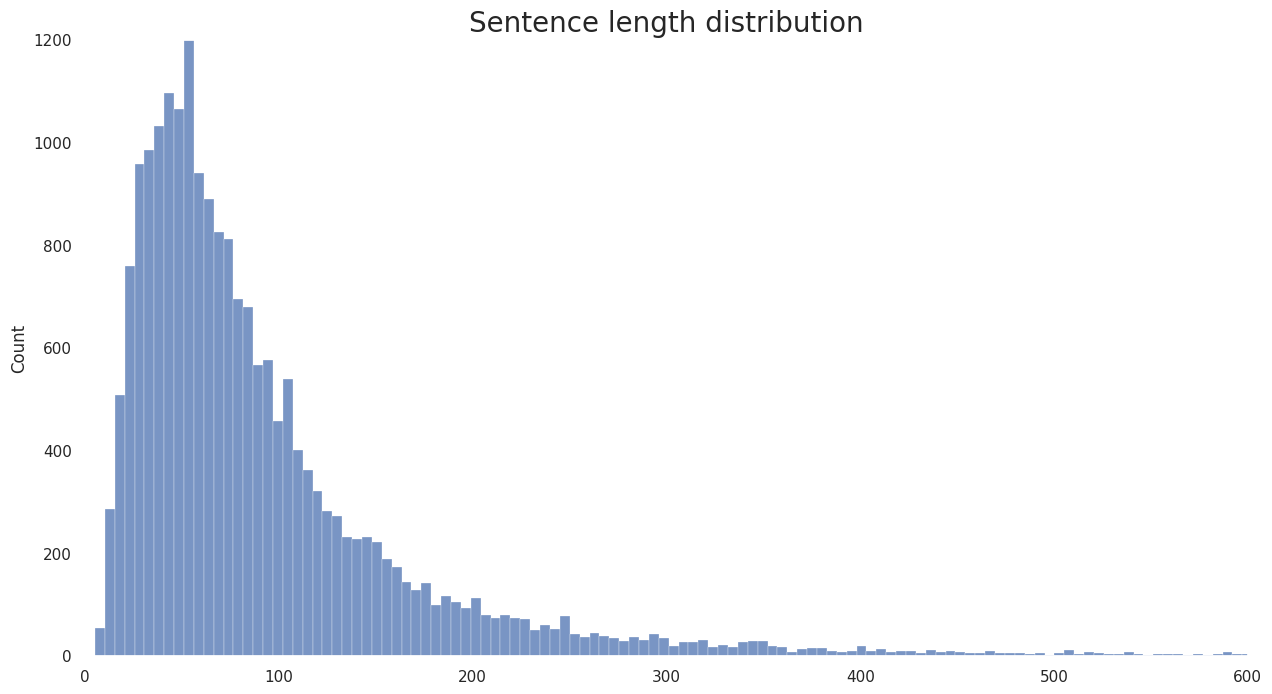

In [ ]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(12,9)})
length_dist = [len(x.split(" ")) for x in X]
sns.histplot(length_dist,palette="pastel")
ax.patch.set_visible(False)
ax.set_xlim(0,600)
ax.set_ylim(0,1200)
ax.set_title("Sentence length distribution",fontsize=20);
plt.show()

In [ ]:
X = tokenizer.texts_to_sequences(X)

max_length = max([len(x) for x in X])
vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("max length of sentence: {}".format(max_length))

Vocabulary size: 48941
max length of sentence: 1924


In [ ]:
# Padding the reviews [Pads sequences to the same length.]
X = pad_sequences(X, padding='post', maxlen=600)

###**Remapping Ratings**
remaping of ratings will help us reduce model output size from 6 to 5, which will improve the results.

In [ ]:
labels = ['1', '2', '3', '4', '5']

y = data['Rating']
y = y.map({1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           })

#**Building the Deep Learning Model**


###**Train Test split**
spliting our data into 90 percent Train and 10 percent test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

###**Hyper parameters**
These hyperparameters were selected by experimenting and these are the best parameters I can get using this model.

In [ ]:
EPOCHS = 2
embedding_dim = 16
BATCH_SIZE = 125
units = 76
val_split = 0.12

###**Long Short Term Memory(LSTM) :**
Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition,speech recognition and anomaly detection in network traffic or IDSs (intrusion detection systems).

In [ ]:
model = tf.keras.Sequential([
    L.Embedding(vocab_size, int(embedding_dim), input_length=X.shape[1]),
    L.Bidirectional(L.LSTM(int(units),return_sequences=True)),
    L.Conv1D(64,3),
    L.MaxPool1D(),
    L.Flatten(),
    L.Dropout(0.2),
    L.Dense(128, activation="relu"),
    L.Dropout(0.2),
    L.Dense(64, activation="relu"),
    L.Dropout(0.2),
    L.Dense(5, activation="softmax")
])

###**Visualize Model**

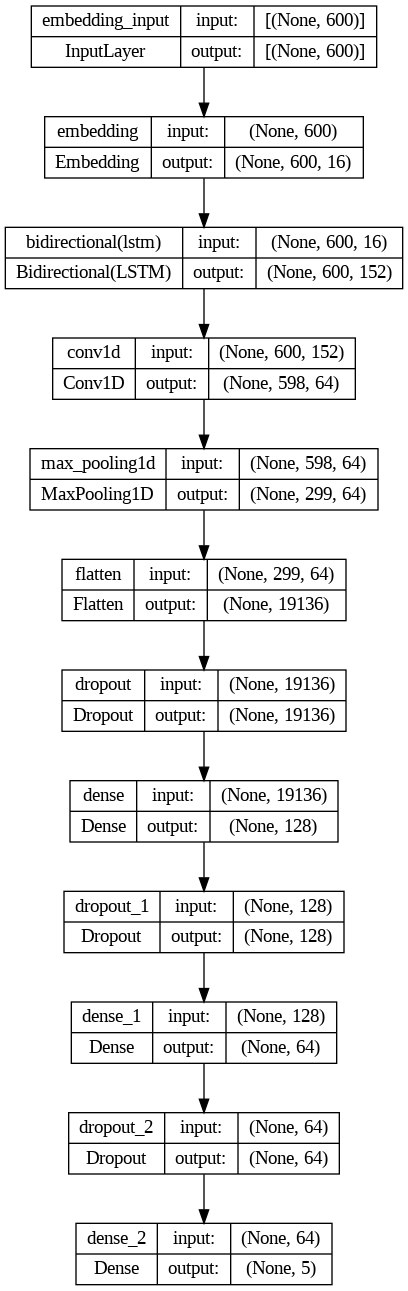

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

###**Compiling Model**
Using Sparse Categorical Crossentropy, Accuracy metric and ADAM optimizer for training.

In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer='adam',metrics=['accuracy']
             )

###**Training**

In [ ]:
history = model.fit(X_train, y_train, epochs=int(EPOCHS), validation_split=float(val_split), batch_size=int(BATCH_SIZE), verbose=2)

Epoch 1/2
130/130 - 297s - loss: 1.1595 - accuracy: 0.4831 - val_loss: 0.9142 - val_accuracy: 0.5861 - 297s/epoch - 2s/step
Epoch 2/2
130/130 - 328s - loss: 0.8593 - accuracy: 0.6103 - val_loss: 0.8817 - val_accuracy: 0.6028 - 328s/epoch - 3s/step


#**Metrics**


###**Accuracy and Sparse Categorical Crossentropy of Train vs Validation**


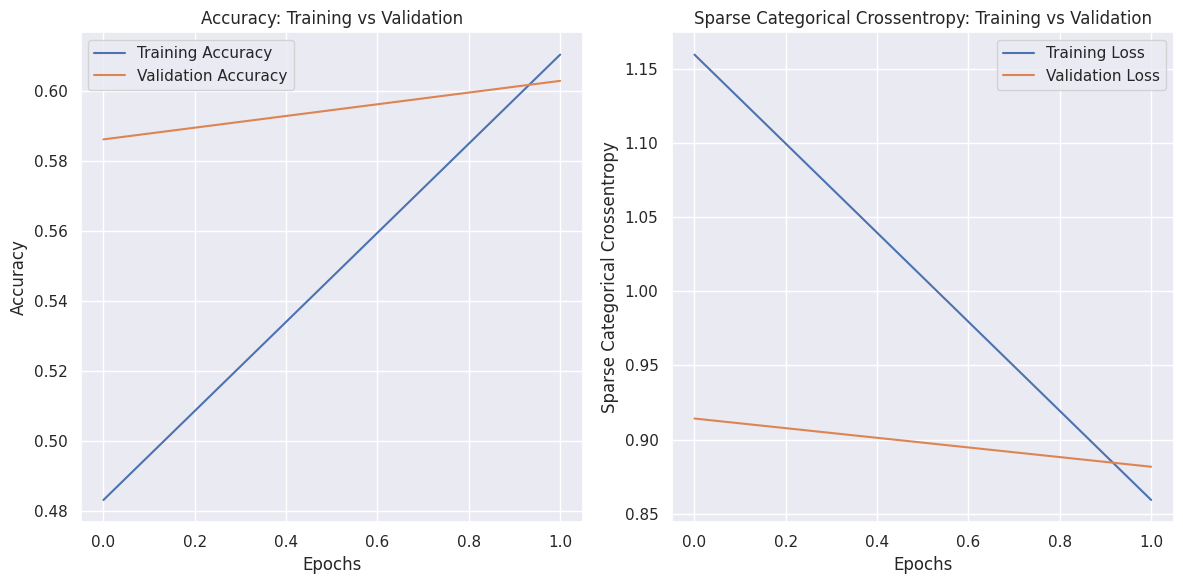

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()

# Plotting Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy: Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Sparse Categorical Crossentropy
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Sparse Categorical Crossentropy: Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Sparse Categorical Crossentropy')
plt.legend()

plt.tight_layout()
plt.show()

###**Prediction**

In [ ]:
pred = model.predict(X_test)
pred_final = np.argmax(pred,axis=-1)
pred_final

65/65 [==============================] - 13s 191ms/step


array([0, 4, 2, ..., 4, 2, 4])

###**Accuracy score on Test Data**

This is the best score I got from predicting test data. This could be improved by using a better deep learning model and text processing.



In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}%'.format(round(accuracy_score(pred_final, y_test)*100),2))

Accuracy: 61%


###**Root Mean Square Error on Test Data**
The root-mean-square deviation or root-mean-square error is a frequently used measure of the differences between values predicted by a model or an estimator and the values observed.

In [ ]:
from sklearn.metrics import mean_squared_error
print("Root mean square error: {}".format(round(np.sqrt(mean_squared_error(pred_final,y_test)),3)))

Root mean square error: 0.74


###**Confusion Matrix Heatmap**
My model have accuracty predicted rating 1, 4 and 5. Its due to imbalce data as our data have more 4-5 star ratings. This could be solved by using more balnced data or using more samples to train the models.

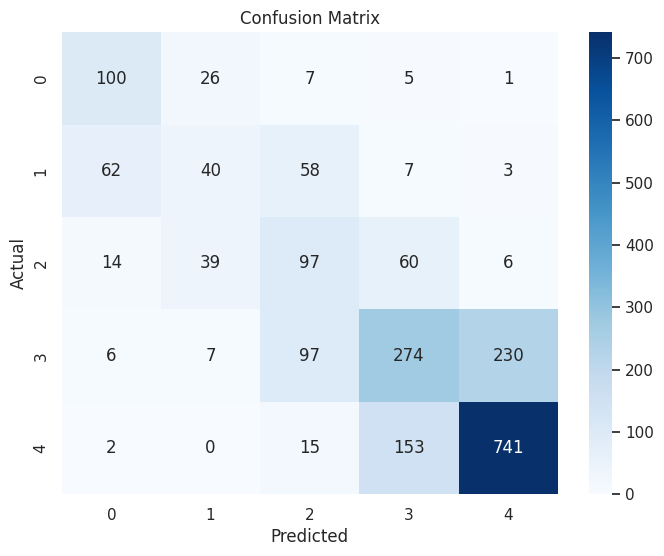

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming pred_final and y_test are your predicted and true labels, respectively

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_final)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###**Classification Report**
5th Rated class was accurately predicted on all three metrics and 4th class was the second-best predicted class. You can dive into the world of classification reports and find your conclusion.



In [ ]:
from sklearn.metrics import classification_report

# Assuming pred_final and y_test are your predicted and true labels, respectively

# Generate classification report
class_report = classification_report(y_test, pred_final)

# Print the classification report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.72      0.62       139
           1       0.36      0.24      0.28       170
           2       0.35      0.45      0.40       216
           3       0.55      0.45      0.49       614
           4       0.76      0.81      0.78       911

    accuracy                           0.61      2050
   macro avg       0.51      0.53      0.51      2050
weighted avg       0.60      0.61      0.60      2050



###**Saving model**

In [ ]:
model.save("Tripadvisor_BiLSTM.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###**Testing Saved model**

In [ ]:
new_model = tf.keras.models.load_model('Tripadvisor_BiLSTM.h5')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 16)           783056    
                                                                 
 bidirectional (Bidirection  (None, 600, 152)          56544     
 al)                                                             
                                                                 
 conv1d (Conv1D)             (None, 598, 64)           29248     
                                                                 
 max_pooling1d (MaxPooling1  (None, 299, 64)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 19136)             0         
                                                                 
 dropout (Dropout)           (None, 19136)             0

#**Conclusion**

###**Tripadvisor Prediction model**
Overall my deep learning model performed well with limited resources and memory restrain. I think using the BERT model can increase accuracy by +20 percent. I haven't experimented with other ML models, but in my experience with gradient booster and logistic models do not perform well in text classification.

###**Final Thoughts**
Sentiments of reviews were all over the place and they did not have any effect on ratings. In reviews sometimes people are being sarcastic which is hard to pick by machine without context. Overall by analyzing keywords I have realized people were mostly writing reviews about the Hotel room, service, staff, and breakfast. Which is a good indicator for a hotel management team so they can focus on it, to get better reviews and 5 stars ratings.